In [118]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [119]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [120]:
credits = pd.read_csv('tmdb_5000_credits.csv')
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## 1) Data Preperation and Cleaning

#### 1.1 How many rows and columns do the datasets have?

In [121]:
print(movies.shape)
print(credits.shape)

(4803, 20)
(4803, 4)


#### 1.2 Drop columns that will not be used in EDA

In [122]:
movies.drop(['homepage', 'keywords', 'popularity', 'overview', 'spoken_languages', 'status', 'tagline', 'vote_count', 'original_title'], axis=1, inplace=True)

In [123]:
movies.head(2)

,budget,genres,id,original_language,production_companies,production_countries,release_date,revenue,runtime,title,vote_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9


#### 1.3 Filter the info. needed from **genre**, **production companies** and **production countries** columns in the **movies** dataframe

In [124]:
empty = []
def genre(df):
    for i in df.genres:
        if len(i.split(":")) <= 1:
            empty.append('Missing')
        else:
            empty.append(i.split(":")[2].split('"')[1].strip())
    movies['genre'] = empty

In [125]:
empty2 = []
def pdn_company(df):
    for i in df.production_companies:
        if len(i.split(":")) <= 1:
            empty2.append('Missing')
        else:
            empty2.append(i.split(":")[1].split('"')[1].strip())
    movies['pdn_company'] = empty2

In [126]:
empty3 = []
def pdn_country(df):
    for i in df.production_countries:
        if len(i.split(":")) <= 1:
            empty3.append(np.nan)
        else:
            empty3.append(i.split(":")[2].split('"')[1].strip())
    movies['pdn_country'] = empty3

In [127]:
genre(movies)
pdn_company(movies)
pdn_country(movies)

In [128]:
movies.head(2)

,budget,genres,id,original_language,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,genre,pdn_company,pdn_country
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,Action,Ingenious Film Partners,United States of America
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,Adventure,Walt Disney Pictures,United States of America


#### 1.4 Drop unnecessary columns from **movies**

In [129]:
movies.drop(['genres', 'production_companies', 'production_countries'], axis=1, inplace=True)

#### 1.5 Rename columns in **movies**

In [130]:
movies.rename(columns={'id':'movie_id','runtime':'duration', 'vote_average':'rating', 'original_language':'language'}, inplace=True)

In [131]:
movies.head(3)

,budget,movie_id,language,release_date,revenue,duration,title,rating,genre,pdn_company,pdn_country
0,237000000,19995,en,2009-12-10,2787965087,162.0,Avatar,7.2,Action,Ingenious Film Partners,United States of America
1,300000000,285,en,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,Adventure,Walt Disney Pictures,United States of America
2,245000000,206647,en,2015-10-26,880674609,148.0,Spectre,6.3,Action,Columbia Pictures,United Kingdom


#### 1.6 Filter the info. needed from **cast** and **crew** in **credits** dataframe

In [132]:
empty4 = []
def director(df):
    for i in df.crew:
        dir_pos = i.find('Directing')
        cur_pos = i.find('}', dir_pos)
        direct = i[dir_pos:cur_pos]
        if len(direct.split(':')) <= 1:
            empty4.append(np.nan)
        else:
            empty4.append(direct.split(':')[4].replace('"', '').strip())
    credits['director'] = empty4

In [133]:
empty5 = []
def star(df):
    for i in df.cast:
        nam_pos = i.find('name')
        ord_pos = i.find('"order": 0', nam_pos)
        actr = i[nam_pos:ord_pos]
        if len(actr.split(':')) <= 1:
            empty5.append(np.nan)
        else:
            empty5.append(actr.split(':')[1].replace('"', '').replace(',', '').strip())
    credits['main_actor'] = empty5

In [134]:
director(credits)
star(credits)


In [135]:
credits.head(2)

,movie_id,title,cast,crew,director,main_actor
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,Sam Worthington
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,Johnny Depp


#### 1.7 Drop unnecessary columns from **credits**

In [136]:
credits.drop(['cast', 'crew'], axis=1, inplace=True)

In [137]:
credits.head(2)

,movie_id,title,director,main_actor
0,19995,Avatar,James Cameron,Sam Worthington
1,285,Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp


#### 1.8 Join **director** and **main_actor** columns to **movies** dataframe

In [138]:
movies = pd.merge(movies, credits, how='outer')

In [139]:
#movies = movies.merge(credits[['movie_id', 'director', 'main_actor']], how='left', on='movie_id')

In [140]:
movies.head(3)

,budget,movie_id,language,release_date,revenue,duration,title,rating,genre,pdn_company,pdn_country,director,main_actor
0,237000000,19995,en,2009-12-10,2787965087,162.0,Avatar,7.2,Action,Ingenious Film Partners,United States of America,James Cameron,Sam Worthington
1,300000000,285,en,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,Adventure,Walt Disney Pictures,United States of America,Gore Verbinski,Johnny Depp
2,245000000,206647,en,2015-10-26,880674609,148.0,Spectre,6.3,Action,Columbia Pictures,United Kingdom,Sam Mendes,Daniel Craig


#### 1.9 Drop rows with missing values for both **budget** and **revenue** and store in new dataframe **bgt_rev**

In [141]:
filt1 = movies.budget == 0
filt2 = movies.revenue == 0
bgt_rev = movies.drop(movies[filt1 & filt2].index)

In [142]:
bgt_rev.shape

(3913, 13)

#### 1.10 Change release date to datetime format

In [143]:
bgt_rev['release_date'] = pd.to_datetime(bgt_rev['release_date'])

In [144]:
print(bgt_rev.release_date.dtypes)

datetime64[ns]


#### 1.11 Create a profit column

In [145]:
bgt_rev['profit'] = bgt_rev.revenue - bgt_rev.budget
bgt_rev.loc[0:4, 'profit']

0    2550965087
1     661000000
2     635674609
3     834939099
4      24139100
Name: profit, dtype: int64

#### 1.12 Create year and month columns

In [146]:
bgt_rev['year'], bgt_rev['month'] = bgt_rev['release_date'].dt.year, bgt_rev['release_date'].dt.month_name().str[:3]
bgt_rev['month'] = pd.Categorical(bgt_rev['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
bgt_rev.loc[0:4, ['year', 'month']]

,year,month
0,2009,Dec
1,2007,May
2,2015,Oct
3,2012,Jul
4,2012,Mar


In [147]:
# The year 2016 is incomplete, therefore it needs to be dropped
bgt_rev[bgt_rev.year == 2016].month.unique()

['Mar', 'Apr', 'Jul', 'Jun', 'May', 'Aug', 'Jan', 'Feb', 'Sep']
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

## 2) Exploratory Data Analysis and Visualization

#### 2.1 Which countries produced the most movies between 2005 and 2015?

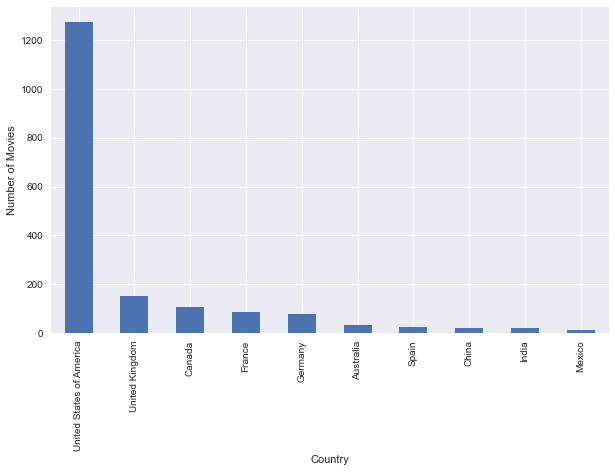

In [148]:
# Exclude 2016 since it is incomplete
bgt_rev = bgt_rev[(bgt_rev['year'] != 2016)]
bgt_rev[(bgt_rev['year'] >= 2005) & (bgt_rev['year'] <= 2015)].pdn_country.value_counts().head(10).plot(kind='bar', figsize=(10, 6), xlabel='Country', ylabel='Number of Movies');

*From the bar graph above, we can see that **USA** produced the highest number of movies between 2005 and 2015. This could be attributed to the fact that America's movie industry is the most developed in the world. Therefore, they have the technology, personnel and financial means to achieve this. Another plausible explanation could be that movies from other parts of the world do not have the same global appeal due to factors such as language and cultural differences. Other countries that made the most movies over the past decade include; **United Kingdom**, **Spain** and **India**.*

#### 2.2 Is the movie industry becoming more or less profitable in USA?

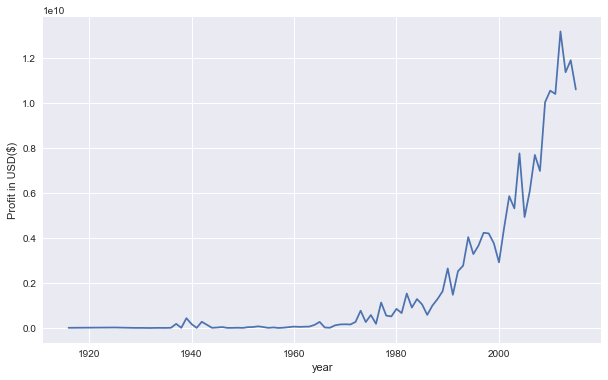

In [149]:
bgt_rev_USA = bgt_rev[bgt_rev['pdn_country'] == 'United States of America']
bgt_rev_USA.groupby('year').profit.sum().plot(kind='line', figsize=(10, 6), ylabel='Profit in USD($)');

*The American movie industry has seen an exponential rise in profotability as can be seen from the line graph above. The year **2012** saw the highest gains with a net profit of over **13 billion dollars**. This could be due to movies such as **The Dark Knight Rises**, **The Hunger Games** and **Avengers** which were highly popular across the globe at the time.*

#### 2.3 What is the best month to release a movie in USA?

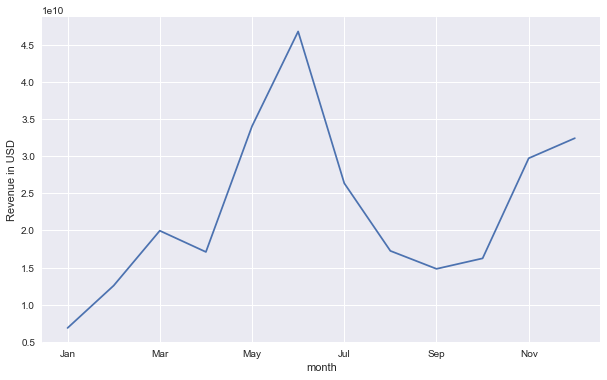

In [150]:
bgt_rev_USA.groupby('month').revenue.sum().plot(kind='line', figsize=(10, 6), ylabel='Revenue in USD');

*The best time to release a movie would be between **April** and **June**. A plausible explanation for this could be that this is the beginning of summer. Since most schools are closed during this time, there are many people who have time for leisure activities such as watching movies. We can also see an increase in revenue towards the end of the year. This can be attributed to the fact that this is a holiday season. People get some time off work for the Christmas Holiday thereby having more free time for leisure activities such as watching movies.*

#### 2.4 What are the most profitable production companies in USA?

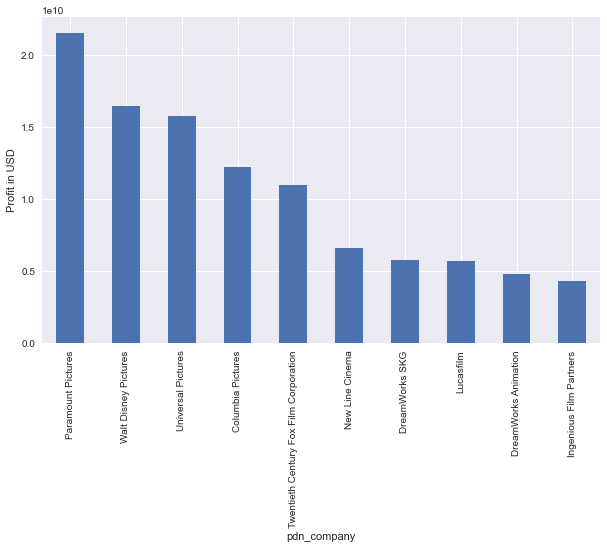

In [151]:
bgt_rev_USA.groupby('pdn_company').profit.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6), ylabel='Profit in USD');

***Paramount Pictures** is the most profitable production company in the US. This can be seen from the bar graph above. Other profitable companies include; **Disney**, **Universal** and **Twentieth Century Fox**.*

#### 2.5 Which genres are the most profitable?

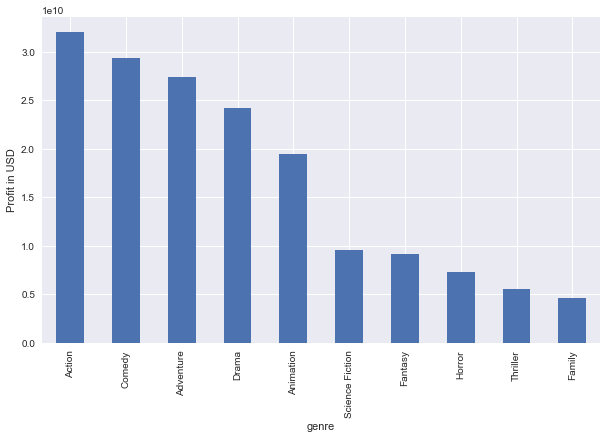

In [152]:
bgt_rev_USA.groupby('genre').profit.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6), ylabel='Profit in USD');

***Action** movies are the most profitable. Other profitable genres include **comedy**, **adventure** and **drama**. It is fascinating to see that **horror** movies are more profitable than the **family** genre. Further analysis can be done to see which movies are the most profitable seasonally i.e. **spring**, **summer**, **fall** & **winter**.*

#### 2.6 Who is the highest grossing actor?

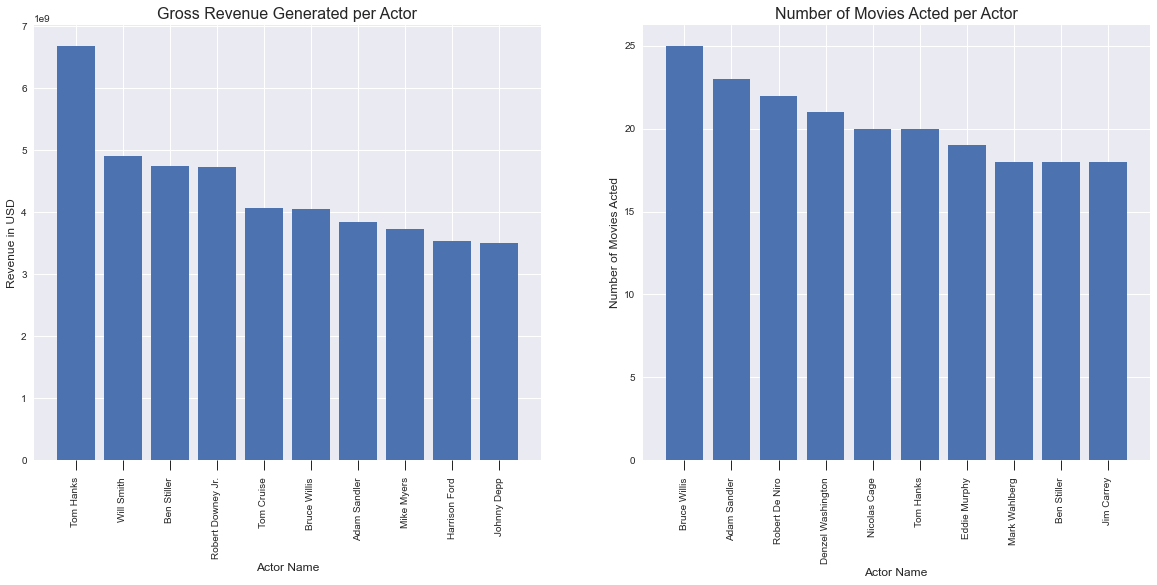

In [153]:
dir_act = bgt_rev_USA.groupby('main_actor').revenue.sum().sort_values(ascending=False).head(10)
dir_act_df = dir_act.to_frame()
dir_act_df.reset_index(inplace=True)
#dir_act_df

dir_titl = bgt_rev_USA.groupby('main_actor').title.count().sort_values(ascending=False).head(10)
dir_titl_df = dir_titl.to_frame()
dir_titl_df.reset_index(inplace=True)
#dir_titl_df

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.bar(dir_act_df['main_actor'], dir_act_df['revenue'])
ax1.set_xlabel('Actor Name', size=12)
ax1.tick_params('x', labelrotation=90, size=10)
ax1.set_ylabel('Revenue in USD', size=12)
ax1.set_title('Gross Revenue Generated per Actor', size=16)

ax2.bar(dir_titl_df['main_actor'], dir_titl_df['title'])
ax2.set_xlabel('Actor Name', size=12)
ax2.tick_params('x', labelrotation=90, size=10)
ax2.set_ylabel('Number of Movies Acted', size=12)
ax2.set_title('Number of Movies Acted per Actor', size=16)

plt.show()

***Tom Hanks** is the highest grossing actor even though he has appeared in fewer movies than the likes of **Bruce Willis**, **Adam Sandler**, **Denzel Washingtion**, etc. This goes to show that it does not matter how many movies an actor appears in. What matters is the quality of the movie. An actor who stars in few high quality movies, has a better portfolio than one who performs in multiple average quality movies.*

#### 2.7 Who is the highest grossing movie director?

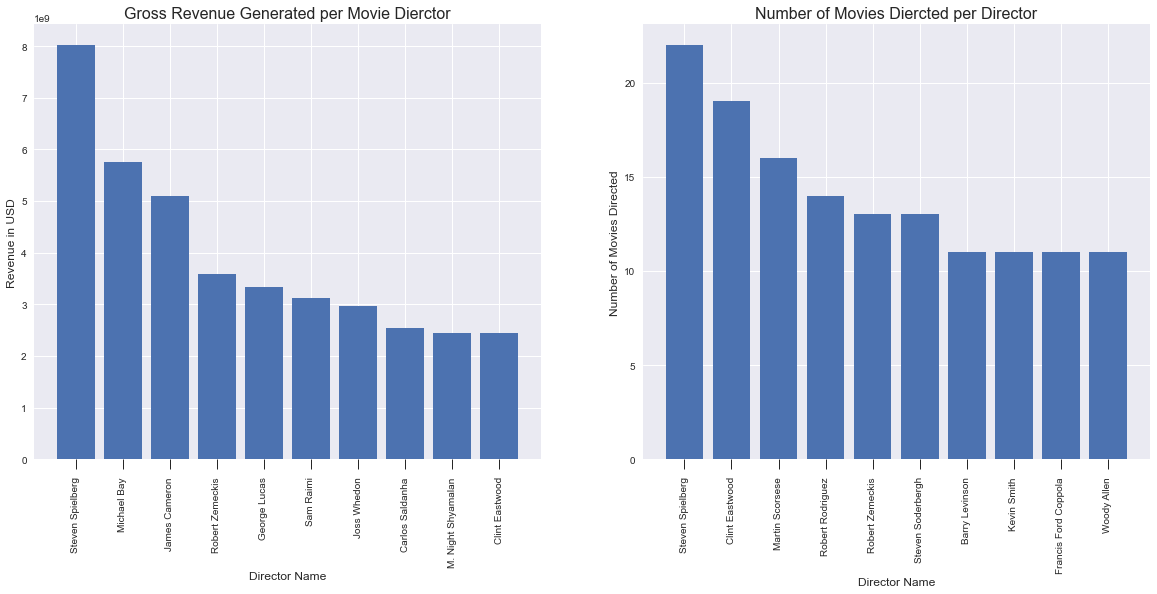

In [154]:
dir_sort = bgt_rev_USA.groupby('director').revenue.sum().sort_values(ascending=False).head(10)
dir_sort_df = dir_sort.to_frame()
dir_sort_df.reset_index(inplace=True)
#dir_sort_df

dir_num = bgt_rev_USA.groupby('director').title.count().sort_values(ascending=False).head(10)
dir_num_df = dir_num.to_frame()
dir_num_df.reset_index(inplace=True)
#dir_num_df

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.bar(dir_sort_df['director'], dir_sort_df['revenue'])
ax1.set_xlabel('Director Name', size=12)
ax1.tick_params('x', labelrotation=90, size=10)
ax1.set_ylabel('Revenue in USD', size=12)
ax1.set_title('Gross Revenue Generated per Movie Dierctor', size=16)

ax2.bar(dir_num_df['director'], dir_num_df['title'])
ax2.set_xlabel('Director Name', size=12)
ax2.tick_params('x', labelrotation=90, size=10)
ax2.set_ylabel('Number of Movies Directed', size=12)
ax2.set_title('Number of Movies Diercted per Director', size=16)

plt.show()

***Steven Spielberg** is the highest grossing movie director. Just like the actors, a director who makes few high quality movies has a better portfolio than one who makes many average quality movies. This can be seen by the movies he has on his resume e.g. **Titanic**, **Avatar**, **Jurassic Park** & **Jaws**. They are few, but have a very high quality.*

#### 2.8 Does movie budget affect revenue?

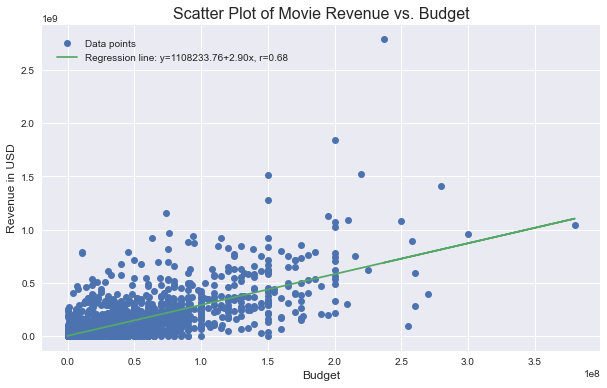

In [155]:
slope, intercept, r, p, stderr = scipy.stats.linregress(bgt_rev_USA['budget'], bgt_rev_USA['revenue'])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(bgt_rev_USA['budget'], bgt_rev_USA['revenue'], linewidth=0, marker='o', label='Data points', markeredgecolor='black')
ax.plot(bgt_rev_USA['budget'], intercept + slope * bgt_rev_USA['budget'], label=line)
ax.set_xlabel('Budget', size=12)
ax.set_ylabel('Revenue in USD', size=12)
ax.set_title('Scatter Plot of Movie Revenue vs. Budget', size=16)
ax.legend(facecolor='white', borderpad=1)
plt.show()

*The movie budget does affect revenue. Acccording to the scatter plot above, budget and revenue have a strong correlation (**r=0.68**). **Revenue is expected to increase by $2.90 on average per $1.00 increase in budget**. This corresponds to a **190% profit** for every dollar added to the budget! However, this result  can be misleading. There are a lot of other factors (**confounding varibles**) that have not been put into consideration that could be behind the strong positive correlation e.g. **quality of the script**, **acting quality**, **release date** etc. Therefore, a well designed experiment would need to be carried out in order to determine the effect that these other factors (together with the budget) have on the revenue. Also, it can be seen that there are a lot of **outliers** from the scatter plot. Outliers tend to distort the mean, this in turn gives us an inaccurate Pearson Correlation Coefficient, r. Therefore, a cretain percentage of the outliers need to be removed before a correlation test is conducted.*

#### 2.9 Does a higher budget result in a higher rating?

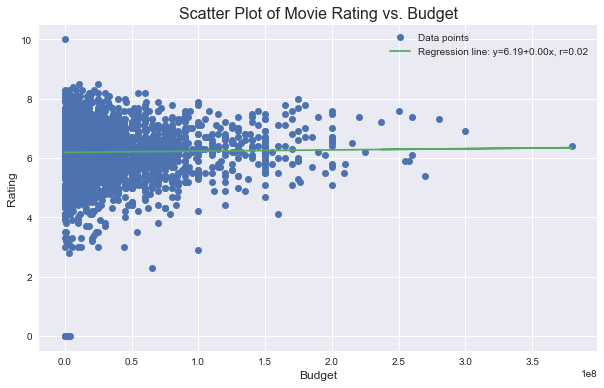

In [156]:
slope, intercept, r, p, stderr = scipy.stats.linregress(bgt_rev_USA['budget'], bgt_rev_USA['rating'])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(bgt_rev_USA['budget'], bgt_rev_USA['rating'], linewidth=0, marker='o', label='Data points', markeredgecolor='black')
ax.plot(bgt_rev_USA['budget'], intercept + slope * bgt_rev_USA['budget'], label=line)
ax.set_xlabel('Budget', size=12)
ax.set_ylabel('Rating', size=12)
ax.set_title('Scatter Plot of Movie Rating vs. Budget', size=16)
ax.legend(facecolor='white')
plt.show()

*According to the scatter plot above, increasing a movie's budget has no effect on the ratings it will receive.*